In [2]:
#Llamar al dataloader
%run DataLoader.ipynb

## Análisis de palabras y texto

In [3]:
#Hacemos un fillna porque a la hora de hacer group by, buscar duplicados o hacer un pivot
#los NaN generan un mal resultado

grupo = dataset.fillna(value='NaN')

# Normalizamos el texto
def normalizar_texto (texto) :
    if(pd.isnull(texto)) : 
        return texto
    
    else : 
        # Primero le sacamos los caracteres de escape como \n y similares
        texto = ' '.join(texto.split())
        #Con estas 2 funciones les sacamos las codificaciones de URL
        texto = urllib.request.unquote(texto)
        texto = html.unescape(texto)
        #Finalmente decodificamos los caracteres
        texto = texto.encode('latin1').decode('utf8', 'ignore')
        return texto

grupo['texto_normalizado'] = grupo.text.apply(lambda x : normalizar_texto(x))
grupo['cant_palabras'] = grupo.texto_normalizado.str.count(' ') + 1
grupo['cant_parrafos'] = grupo.text.str.count('\n') + 1
# grupo.keyword = grupo.keyword.apply(lambda x : normalizar_texto(x))
# grupo.location = grupo.location.apply(lambda x : normalizar_texto(x))

In [223]:
#Tweets y cant de palabras con dist verdadero/falso
#Tweets y cantidad de parrafos con dist verdadero/falso


grupo1 = grupo.groupby(['cant_palabras', 'target']).agg({'text':'count'})
grupo1.columns = ['repeticiones']
grupo1 = grupo1.reset_index()

# Hacemos un pivot de la tabla para ver los resultados repetidos de mejor manera
grupo1 = grupo1.pivot_table(index = ['cant_palabras'],\
     columns = 'target', values = 'repeticiones', fill_value = 0)
grupo1.columns = ['Falso', 'Verdadero']

grupo1

,Falso,Verdadero
cant_palabras,,
1,8,0
2,30,4
3,62,13
4,91,24
5,120,39
6,134,52
7,159,83
8,160,133
9,220,143


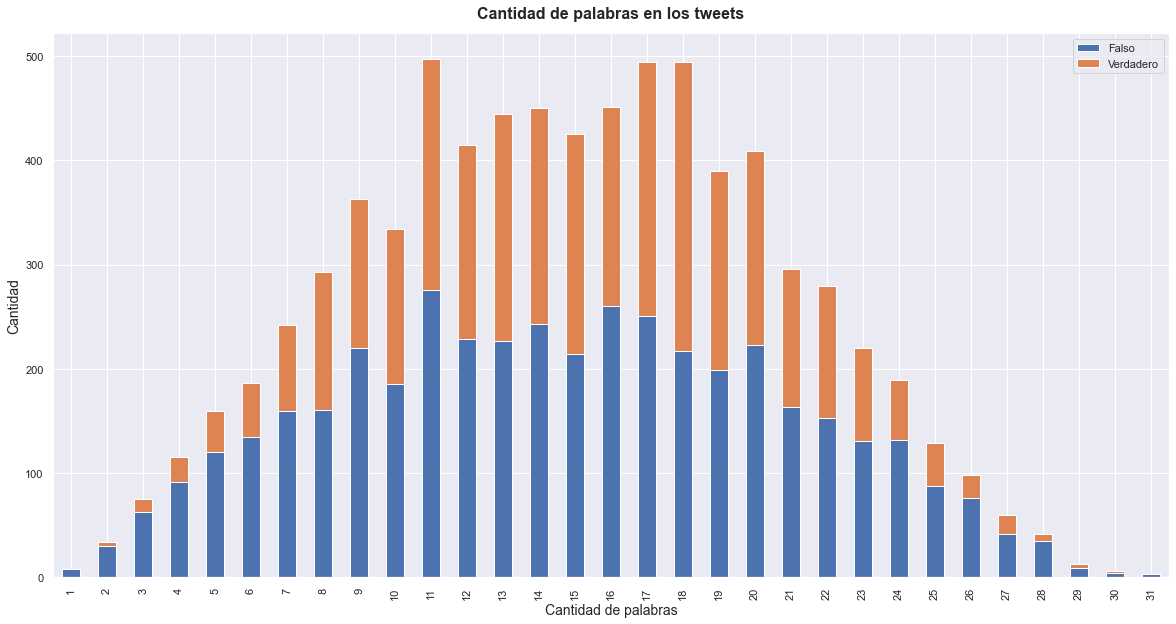

In [219]:

sns.set()
fig, ax = plt.subplots()
grupo.plot.bar(ax = ax, stacked = True)
ax.set_ylabel('Cantidad',fontsize=14)
plt.xlabel("Cantidad de palabras",fontsize=14)
ax.set_title('Cantidad de palabras en los tweets',\
             fontsize=16,fontweight='bold', pad = 15)
plt.show()
# fig.savefig('figure.png')

## Análisis de tweets repetidos por location y target

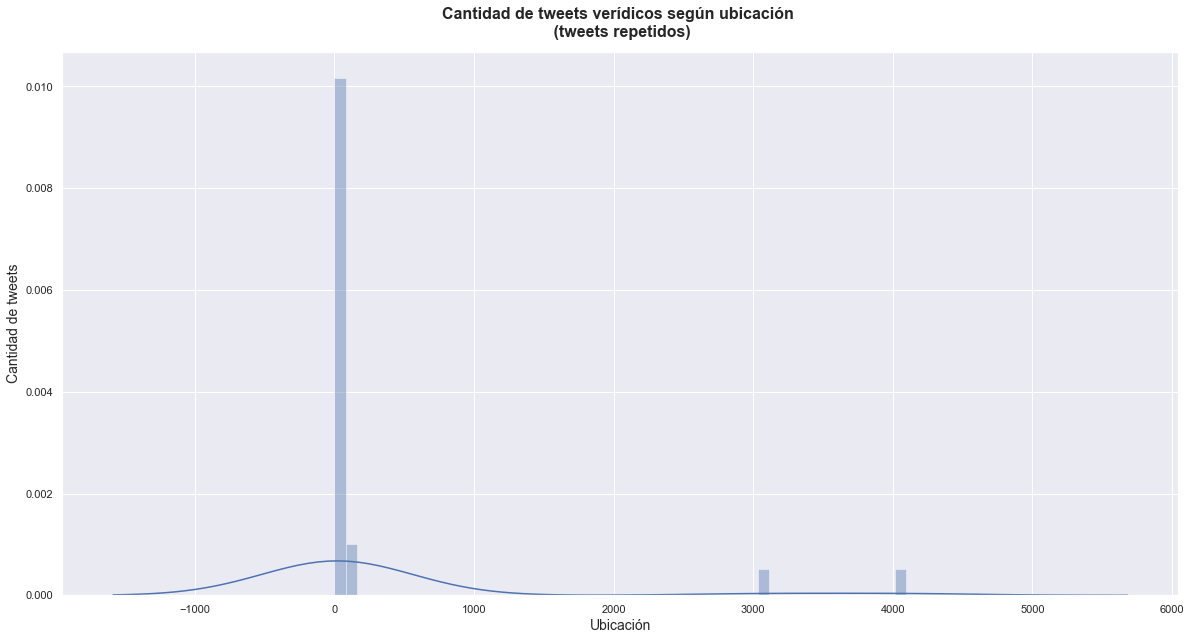

In [6]:
grupo2 = grupo.groupby(['cant_parrafos', 'target']).agg({'text':'count'})
grupo2.columns = ['repeticiones']
grupo2 = grupo2.reset_index()

# Hacemos un pivot de la tabla para ver los resultados repetidos de mejor manera
grupo2 = grupo2.pivot_table(index = ['cant_parrafos'],\
     columns = 'target', values = 'repeticiones', fill_value = 0)
grupo2.columns = ['Falso', 'Verdadero']

grupo2

sns.set()
fig, ax = plt.subplots()
sns.distplot(grupo2)
ax.set_ylabel('Cantidad de tweets',fontsize=14)
plt.xlabel("Ubicación",fontsize=14)
ax.set_title('Cantidad de tweets verídicos según ubicación \n (tweets repetidos)',\
             fontsize=16,fontweight='bold', pad = 15)
plt.show()